In [1]:
library(RMySQL)

Warning message:
"package 'RMySQL' was built under R version 3.3.2"Loading required package: DBI


In [2]:
mydb<-dbConnect(MySQL(),user='root',password='bryant718',dbname='lang_qin',host='127.0.0.1')

In [3]:
query_1<-dbSendQuery(mydb,'select name as name, score as score,hard as hardness, hotness as hot from pro_rate')


In [4]:
dat_1<-fetch(query_1,n=-1)

In [5]:
query_2<-dbSendQuery(mydb,'select substring(name,1,instr(name,",")-1) as lastname,dept_name from dept_1')

In [6]:
dat_2<-fetch(query_2,n=-1)

In [7]:
df<-merge(dat_2,dat_1,by.x = "lastname",by.y = 'name',all.x = T)

In [8]:
# plot the data frame to take a look at the insight of the data by using ggplot

In [9]:
library(ggplot2)
library(plotly)


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



In [10]:
library(fastmatch)

Warning message:
"package 'fastmatch' was built under R version 3.3.2"

In [11]:
head(df)

lastname,dept_name,score,hardness,hot
Aaron,Math,2.9,3.3,/assets/chilis/cold-chili.png
Abdi,Medical,4.6,3.8,/assets/chilis/new-hot-chili.png
Acharya,Engineer,1.4,4.0,/assets/chilis/cold-chili.png
Ackerman,Medical,4.3,2.9,/assets/chilis/cold-chili.png
Acosta,Math,4.5,2.0,/assets/chilis/cold-chili.png
Adams,Society,4.0,3.5,/assets/chilis/new-hot-chili.png


In [12]:
vec<-df$hot

In [14]:
dvec<-as.factor(vec)

In [15]:
hotness<-fmatch(dvec,c('/assets/chilis/cold-chili.png','/assets/chilis/new-hot-chili.png'))

In [16]:
df$hotness<-hotness

In [17]:
head(df)

lastname,dept_name,score,hardness,hot,hotness
Aaron,Math,2.9,3.3,/assets/chilis/cold-chili.png,1
Abdi,Medical,4.6,3.8,/assets/chilis/new-hot-chili.png,2
Acharya,Engineer,1.4,4.0,/assets/chilis/cold-chili.png,1
Ackerman,Medical,4.3,2.9,/assets/chilis/cold-chili.png,1
Acosta,Math,4.5,2.0,/assets/chilis/cold-chili.png,1
Adams,Society,4.0,3.5,/assets/chilis/new-hot-chili.png,2


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 137 rows containing non-finite values (stat_bin)."

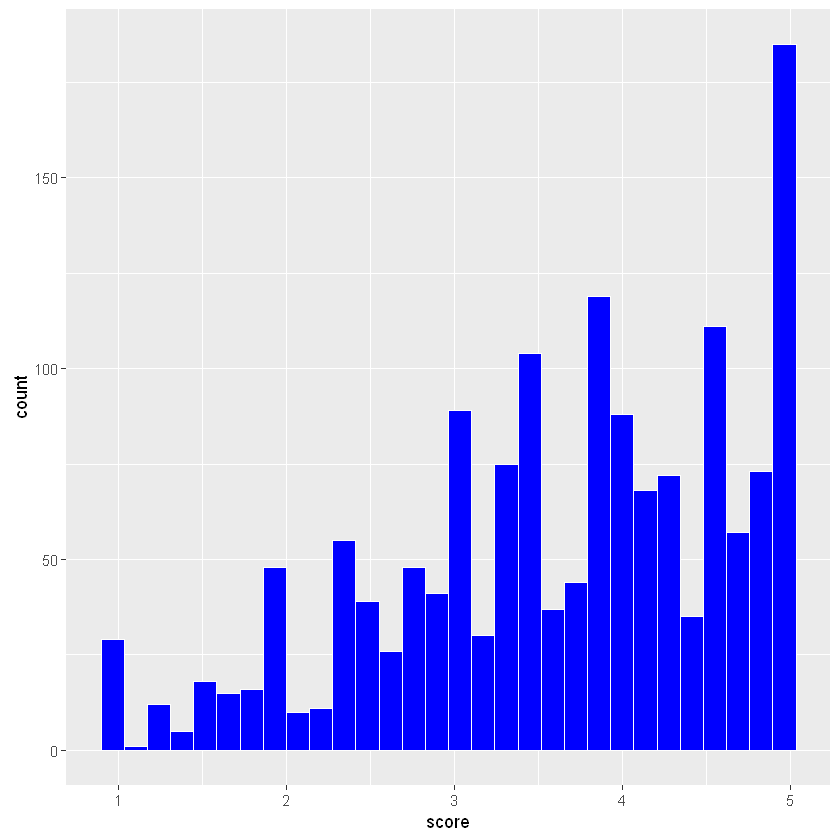

In [18]:
# histogram of score and hardness 
p1<-ggplot(df,aes(x=score))
p1+geom_histogram(color='white',fill='blue')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 137 rows containing non-finite values (stat_bin)."

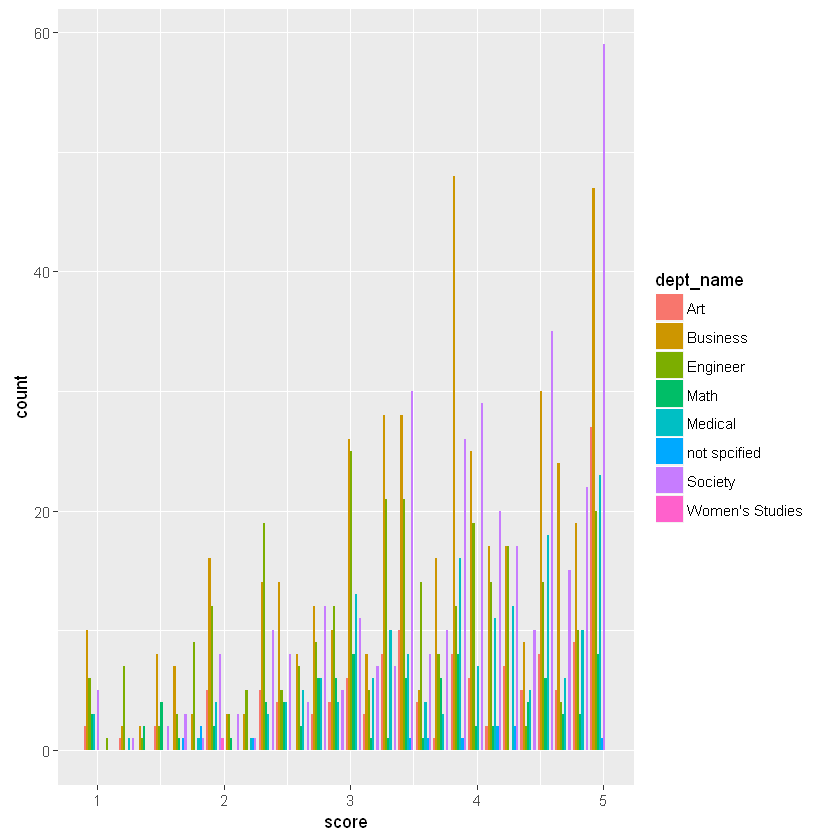

In [20]:
#histogram of score and hardness for different department
p4<-ggplot(df,aes(x=score,fill=dept_name))
p4+geom_histogram(position = 'dodge')

Warning message:
"Removed 137 rows containing missing values (position_stack)."

No trace type specified:
  Based on info supplied, a 'bar' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#bar
Warning message:
"Ignoring 137 observations"

HTML widgets cannot be represented in plain text (need html)

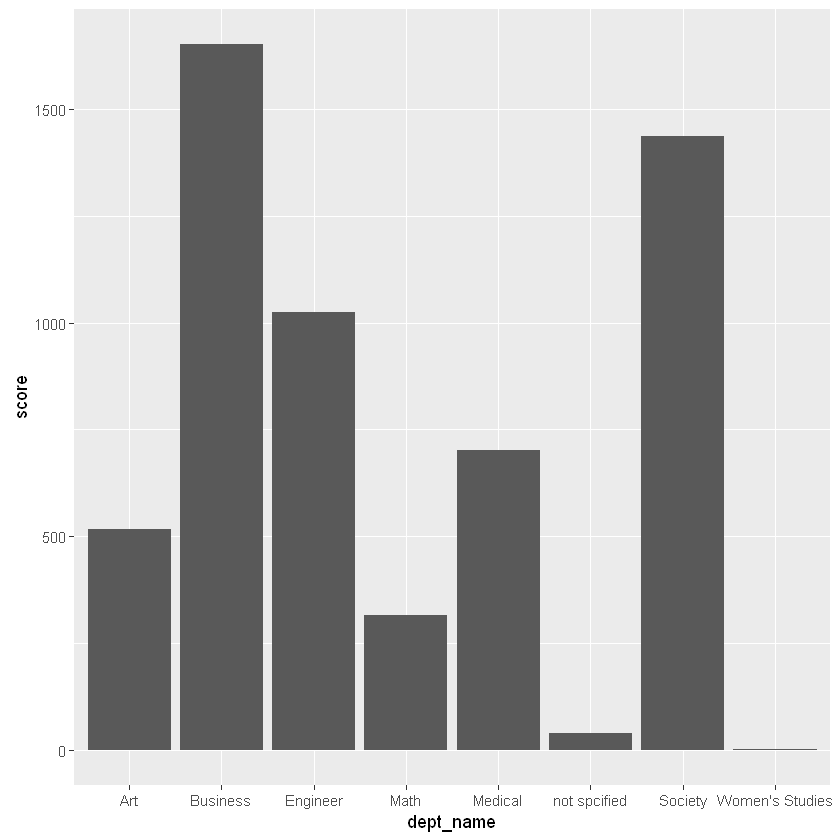

In [24]:
# barchart showing the score and hardness of different department
p2<-ggplot(df,aes(x=dept_name,y=score))
p2+geom_bar(stat = 'identity')
plot_ly(df,x= ~dept_name, y = ~score,text= ~paste("dept_name: ", dept_name))


Warning message:
"Removed 137 rows containing missing values (position_stack)."

No trace type specified:
  Based on info supplied, a 'histogram2d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#histogram2d
Warning message:
"Ignoring 137 observations"Warning message:
"'histogram2d' objects don't have these attributes: 'text'
Valid attributes include:
'type', 'visible', 'showlegend', 'legendgroup', 'opacity', 'name', 'uid', 'hoverinfo', 'stream', 'x', 'y', 'z', 'marker', 'histnorm', 'histfunc', 'autobinx', 'nbinsx', 'xbins', 'autobiny', 'nbinsy', 'ybins', 'zsmooth', 'colorbar', 'zauto', 'zmin', 'zmax', 'colorscale', 'autocolorscale', 'reversescale', 'showscale', 'xaxis', 'yaxis', 'xsrc', 'ysrc', 'zsrc', 'key'
"

HTML widgets cannot be represented in plain text (need html)

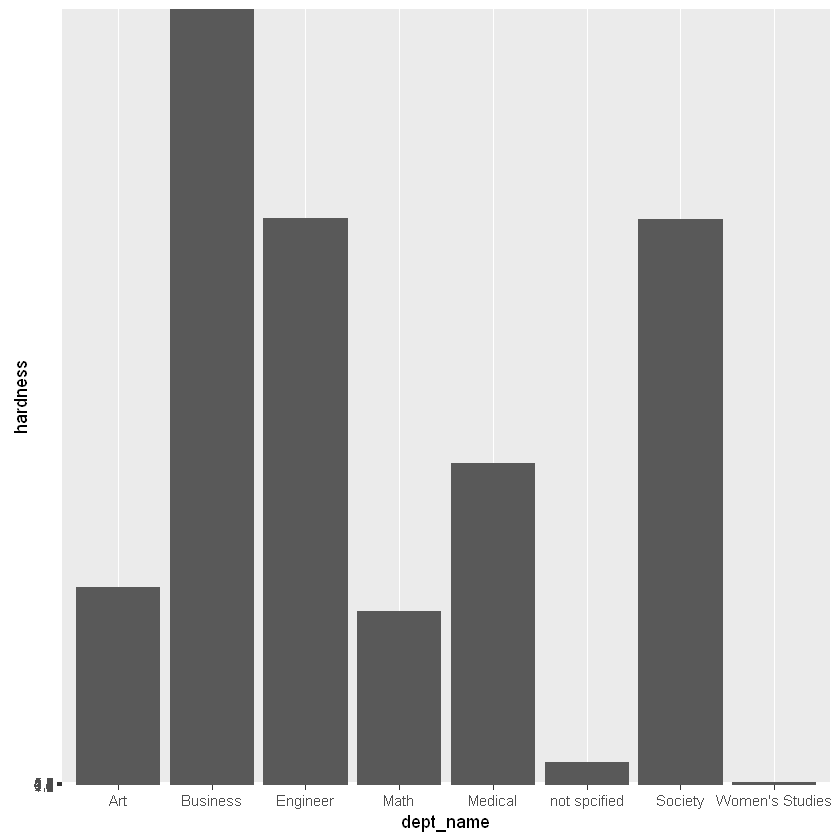

In [26]:
p5<-ggplot(df,aes(x=dept_name,y=hardness))
p5+geom_bar(stat = 'identity')
plot_ly(df,x= ~dept_name, y = ~hardness,text= ~paste("dept_name: ", dept_name))

Warning message:
"Removed 137 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 137 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 137 rows containing missing values (geom_point)."

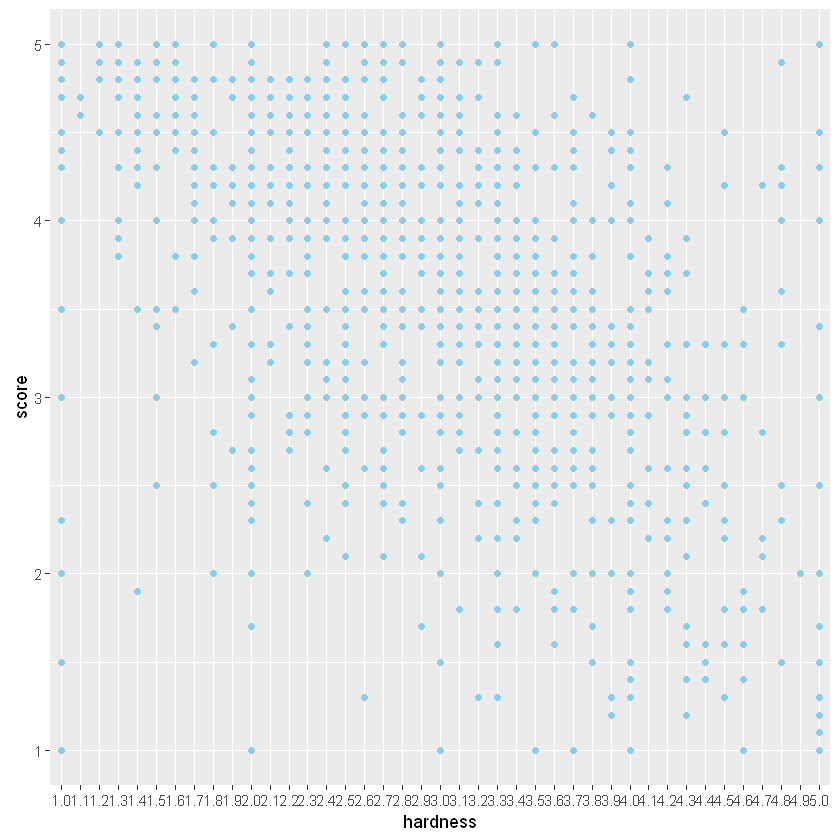

In [28]:
# scatter plot to see the relation ship between rate and hardness
p6<-ggplot(df,aes(x=hardness,y=score))
p6+geom_point(color='skyblue')+geom_smooth()+
  geom_smooth(method='lm',color='red')

Warning message:
"Removed 137 rows containing missing values (geom_point)."

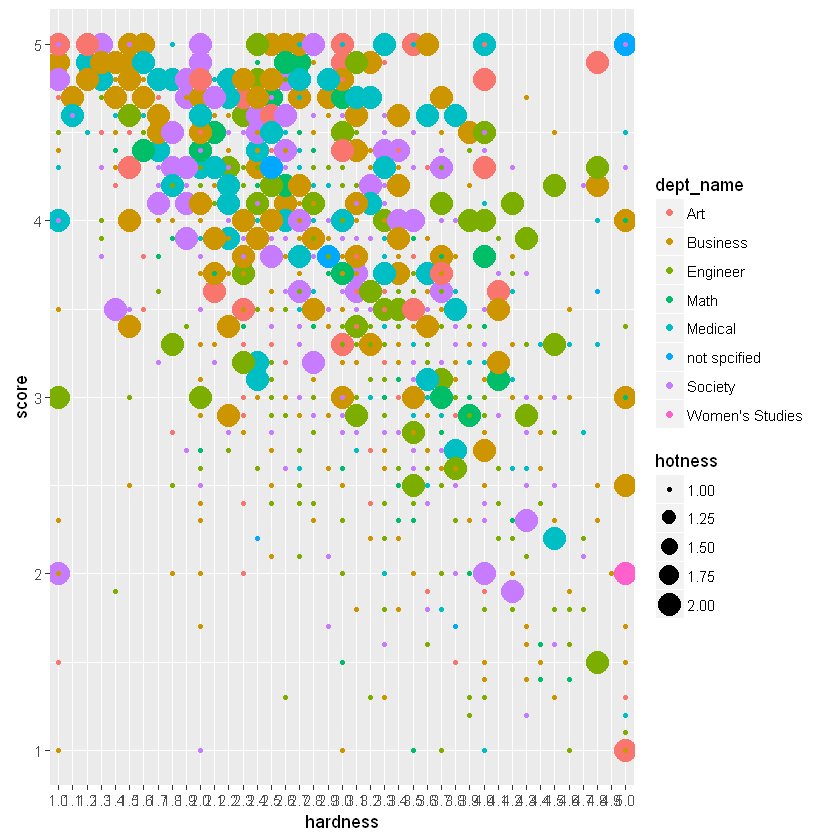

In [29]:
#bubble chart
p7<-ggplot(df,aes(x=hardness,y=score,size=hotness,color=dept_name))
p7+geom_point()

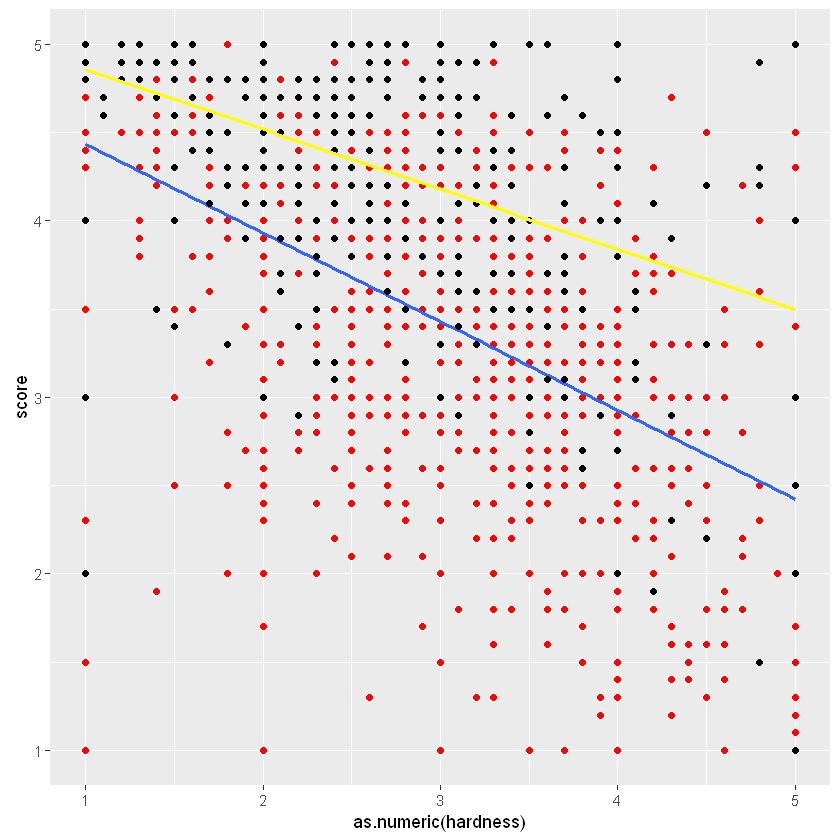

In [30]:
#hotness affect?
cold<-subset(df,hotness==1)
hot<-subset(df,hotness==2)
p7<-ggplot(cold,aes(x=as.numeric(hardness),y=score))
p7+geom_point(color='red')+geom_smooth(method='lm',se=F)+
  geom_point(data=hot,aes(x=as.numeric(hardness),y=score))+
  geom_smooth(data=hot,aes(x=as.numeric(hardness),y=score),se=F,method = 'lm',color='yellow')
#for professor with less hotness, score decrease more significantly as hardness goes up

In [32]:
sdf<-data.frame(df$score,as.numeric(df$hardness))
names(sdf)<-c('score','hardness')
sdf$score<-scale(sdf$score)
sdf$hardness<-scale(sdf$hardness)

In [33]:
#dig into the data
#cluster:
for(i in 1:ncol(sdf)){
  sdf[is.na(sdf[,i]), i] <- mean(sdf[,i], na.rm = TRUE)
}
#sub the na to mean

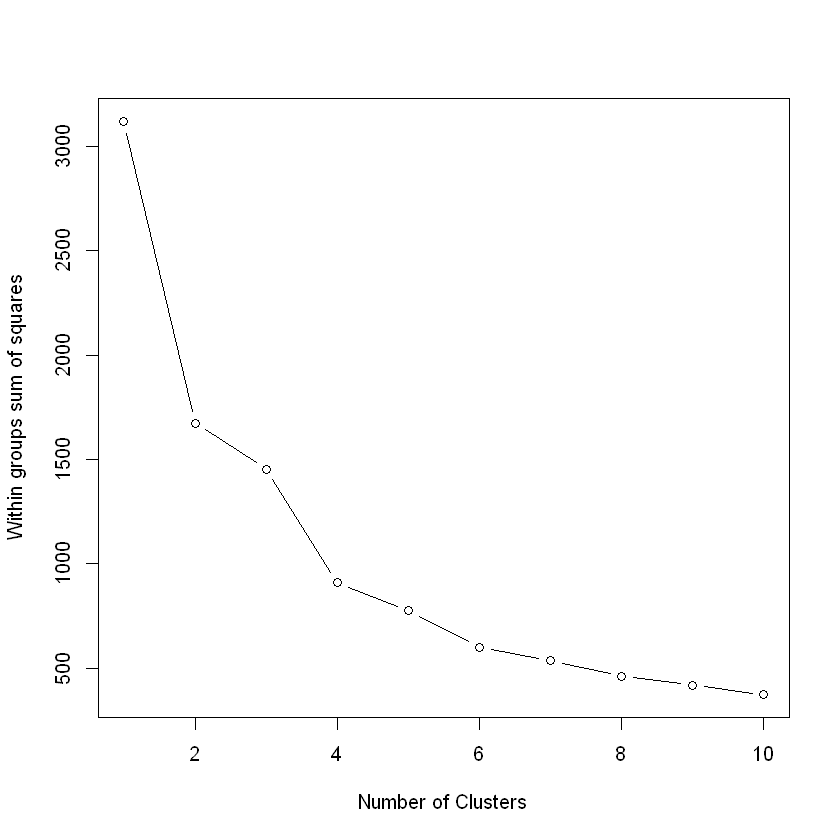

In [34]:
#number of clusters best fit
wss <- (nrow(sdf)-1)*sum(apply(sdf,2,var))
for (i in 1:10) wss[i] <- sum(kmeans(sdf, centers=i)$withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares")
#plot the wss for best #of clusters

In [35]:
cluster_1 <-kmeans(sdf[,c(1,2)],4) 
cluster_1
#with a bss/tss =71%
#pamk

K-means clustering with 4 clusters of sizes 327, 412, 671, 288

Cluster means:
       score   hardness
1 -1.3365777  1.1593508
2  0.9039141 -1.1109010
3  0.3613620  0.3290117
4 -0.6174501 -0.4936922

Clustering vector:
   [1] 4 3 1 3 2 3 1 4 3 1 1 1 4 1 3 3 2 2 4 3 3 2 2 2 2 3 3 2 4 2 2 3 2 1 2 3 1
  [38] 3 3 3 3 3 3 3 3 3 3 4 3 2 3 2 1 3 3 3 2 4 2 3 2 3 2 1 4 3 3 2 2 3 4 1 1 2
  [75] 3 2 2 2 1 3 3 3 3 3 1 4 3 4 1 4 3 4 4 2 4 2 1 1 1 2 4 2 1 1 4 2 3 1 2 3 3
 [112] 3 4 3 3 2 2 2 2 2 3 1 3 3 4 3 1 1 3 1 1 1 3 4 1 4 3 3 2 2 2 2 2 3 1 1 4 3
 [149] 2 1 3 2 3 1 1 2 3 3 1 3 3 1 2 3 4 3 3 1 3 3 4 1 1 2 1 3 2 3 2 3 1 2 3 3 3
 [186] 3 3 3 3 1 2 1 3 3 3 3 4 3 2 4 3 4 2 2 2 1 1 2 1 3 1 2 4 3 4 1 2 3 1 1 1 1
 [223] 2 2 1 3 2 3 3 3 3 2 3 3 1 2 1 3 3 1 3 1 3 3 3 3 3 3 2 2 1 1 1 1 4 4 4 4 4
 [260] 4 1 2 1 1 2 1 1 1 1 3 3 2 4 4 1 1 3 3 4 3 3 1 3 3 2 4 4 3 3 3 3 1 3 3 2 3
 [297] 3 4 3 3 2 2 1 4 3 2 2 1 2 3 3 2 3 1 4 2 1 1 2 4 2 3 2 4 2 2 3 3 1 4 4 3 1
 [334] 2 3 3 1 3 3 3 3 3 1 3 4 4 4 2 2 1 1 3 1 1 3 2

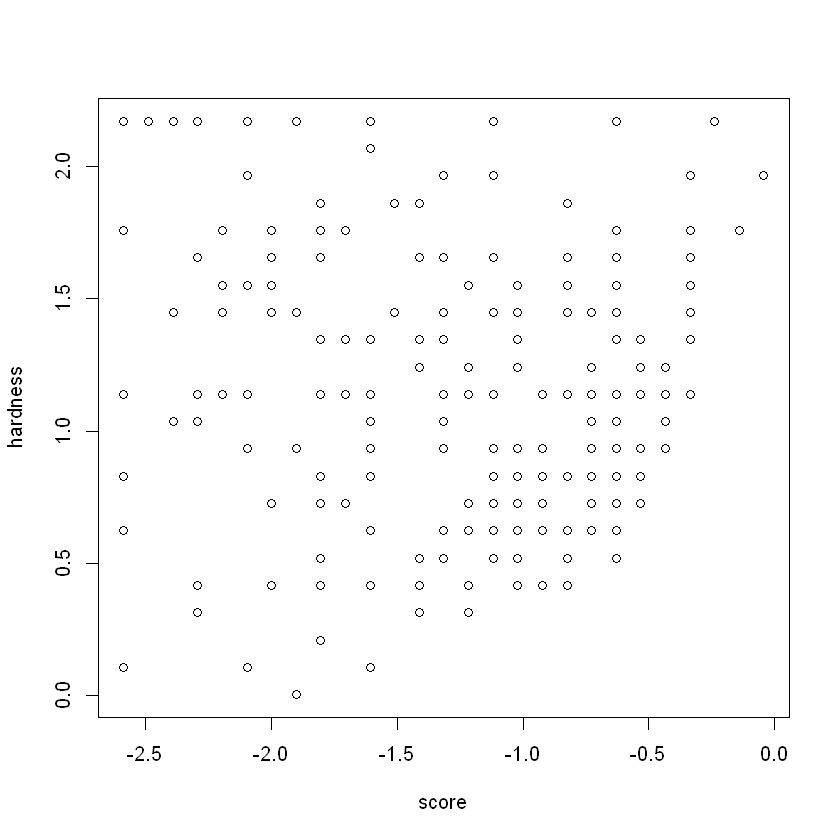

In [37]:
#plot the first cluster

plot(sdf[cluster_1[['cluster']]==1,c(1,2)])

In [38]:
#regression 
#convert hotness to dummy variable
dummy_df<-within(df,hotness<-relevel(as.factor(hotness),"1"))

In [39]:
#simply look at hardness and score
l1<-lm(as.numeric(df$hardness)~df$score)
summary(l1)
#p<2e-16, significant y = -0.46 x, however only 23% x are releated


Call:
lm(formula = as.numeric(df$hardness) ~ df$score)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.10822 -0.64212  0.03246  0.57822  2.72228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.56584    0.07938   57.52   <2e-16 ***
df$score    -0.45763    0.02098  -21.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.847 on 1559 degrees of freedom
  (137 observations deleted due to missingness)
Multiple R-squared:  0.2339,	Adjusted R-squared:  0.2334 
F-statistic: 475.9 on 1 and 1559 DF,  p-value: < 2.2e-16


In [40]:
#run lm by using hotness of 1(cold) as reference
l2<-lm(as.numeric(dummy_df$score)~dummy_df$hotness,dummy_df)
summary(l2)
#estimate is 0.86 and p value is less than 0.01
#hotness will have a positive impact on score, and only 12% can be explained


Call:
lm(formula = as.numeric(dummy_df$score) ~ dummy_df$hotness, data = dummy_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2986 -0.5986  0.1014  0.7014  1.5591 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.44094    0.02767  124.35   <2e-16 ***
dummy_df$hotness2  0.85771    0.05691   15.07   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9554 on 1559 degrees of freedom
  (137 observations deleted due to missingness)
Multiple R-squared:  0.1272,	Adjusted R-squared:  0.1266 
F-statistic: 227.1 on 1 and 1559 DF,  p-value: < 2.2e-16


In [41]:
#department
l4<-lm(as.numeric(dummy_df$score)~dummy_df$dept_name,dummy_df)
summary(l4)


Call:
lm(formula = as.numeric(dummy_df$score) ~ dummy_df$dept_name, 
    data = dummy_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8908 -0.6098  0.1092  0.8092  1.6632 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.83037    0.08616  44.455  < 2e-16 ***
dummy_df$dept_nameBusiness        -0.23102    0.09802  -2.357 0.018548 *  
dummy_df$dept_nameEngineer        -0.49356    0.10339  -4.774 1.98e-06 ***
dummy_df$dept_nameMath            -0.47824    0.13448  -3.556 0.000388 ***
dummy_df$dept_nameMedical         -0.02059    0.11345  -0.181 0.856022    
dummy_df$dept_namenot spcified    -0.46370    0.30157  -1.538 0.124339    
dummy_df$dept_nameSociety          0.06042    0.10070   0.600 0.548613    
dummy_df$dept_nameWomen's Studies -1.83037    1.00481  -1.822 0.068708 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.001 on 1553 degrees of freedom

In [42]:
#rule out all the possible difference between department, hotness
dummy_df$dept_name<-relevel(as.factor(dummy_df$dept_name),"Women's Studies")
l3<-lm(dummy_df$score~dummy_df$dept_name+dummy_df$hotness)
summary(l3)


Call:
lm(formula = dummy_df$score ~ dummy_df$dept_name + dummy_df$hotness)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4591 -0.6109  0.1212  0.6390  1.8249 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     1.16786    0.93901   1.244  0.21379    
dummy_df$dept_nameArt           2.45910    0.94175   2.611  0.00911 ** 
dummy_df$dept_nameBusiness      2.22662    0.93930   2.371  0.01789 *  
dummy_df$dept_nameEngineer      2.03342    0.94003   2.163  0.03068 *  
dummy_df$dept_nameMath          2.00722    0.94334   2.128  0.03351 *  
dummy_df$dept_nameMedical       2.39318    0.94069   2.544  0.01105 *  
dummy_df$dept_namenot spcified  1.99077    0.97651   2.039  0.04165 *  
dummy_df$dept_nameSociety       2.51094    0.93953   2.673  0.00761 ** 
dummy_df$hotness2               0.83214    0.05616  14.818  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.

In [43]:
# we use hotness as 1 which is cold and women's studies as ref, it shows that, for
#department, changing from business to women's studies have the most effect on the
#score, whereas not specified group has the least effect, which have a difference 
#from only consider department
#for hotness, changing from hot to cold will have a 0.83 increase on socre, it is
#slightly different from only consider hotness.

In [47]:
#Add hardness into account
l5<-lm(dummy_df$score~dummy_df$dept_name+dummy_df$hotness+log(as.numeric(dummy_df$hardness)),dummy_df)
summary(l5)


Call:
lm(formula = dummy_df$score ~ dummy_df$dept_name + dummy_df$hotness + 
    log(as.numeric(dummy_df$hardness)), data = dummy_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6867 -0.5244  0.0592  0.5710  2.3429 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         2.98507    0.85889   3.475 0.000524 ***
dummy_df$dept_nameArt               1.60994    0.85681   1.879 0.060432 .  
dummy_df$dept_nameBusiness          1.49976    0.85425   1.756 0.079344 .  
dummy_df$dept_nameEngineer          1.36750    0.85475   1.600 0.109830    
dummy_df$dept_nameMath              1.35782    0.85772   1.583 0.113610    
dummy_df$dept_nameMedical           1.69450    0.85544   1.981 0.047784 *  
dummy_df$dept_namenot spcified      1.34507    0.88782   1.515 0.129971    
dummy_df$dept_nameSociety           1.70165    0.85468   1.991 0.046658 *  
dummy_df$hotness2                   0.71039    0.05146  13.806  < 2e-16 

In [48]:
#as we can see from the result log(hardness) have a negative effect on score
#note we take log(hardness) here

In [45]:
#add interaction 
l6<-lm(dummy_df$score~dummy_df$hotness+dummy_df$dept_name+dummy_df$hotness * dummy_df$dept_name)
summary(l6)


Call:
lm(formula = dummy_df$score ~ dummy_df$hotness + dummy_df$dept_name + 
    dummy_df$hotness * dummy_df$dept_name)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3576 -0.6144  0.1451  0.6451  1.9176 

Coefficients: (1 not defined because of singularities)
                                                 Estimate Std. Error t value
(Intercept)                                      1.313872   0.942689   1.394
dummy_df$hotness2                                0.686128   0.111834   6.135
dummy_df$dept_nameArt                            2.345932   0.947234   2.477
dummy_df$dept_nameBusiness                       2.038729   0.944031   2.160
dummy_df$dept_nameEngineer                       1.900525   0.944495   2.012
dummy_df$dept_nameMath                           1.768560   0.948948   1.864
dummy_df$dept_nameMedical                        2.290004   0.946284   2.420
dummy_df$dept_namenot spcified                   1.719461   0.992981   1.732
dummy_df$dept_nameSociety           

In [46]:
#to interpret
#women's study and hotness of 1 as reference
#take for example, dummy_df$hotness2:dummy_df$dept_nameMath
#the estimate is 0.58 meaning the it will have a postive effect of hotness on score
#when changing from women's study to math